In [15]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
open("attacks.csv")

<_io.TextIOWrapper name='attacks.csv' mode='r' encoding='cp1252'>

In [17]:
shark_attack = pd.read_csv('attacks.csv', encoding="cp1252")

In [18]:
shark_attack

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
shark_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [20]:
missing_values = pd.isnull(shark_attack) # Compruebo si faltan valores en el DataFrame
missing_counts = missing_values.sum() # Cuento los valores que faltan en cada columna
columns_missing = missing_counts[missing_counts > 0].count() # Cuento las columnas con los valores faltantes
all_columns_missing = missing_counts.all() # Compruebo si a todas las columnas le faltan valores
total_missing_values = missing_counts.sum() # Calculo el número total de valores faltantes

print(missing_counts)
print("\nColumnas que no tienen valores:", columns_missing)
print("Todas las columnas tienen valores faltantes:", all_columns_missing)
print("\nTotal de valores faltantes en el dataFrame:", total_missing_values)

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

Columnas que no tienen valores: 24
Todas las columnas tienen valores faltantes: True

Total de valores faltantes en el dataFrame: 488276


In [21]:
shark_attack=shark_attack.dropna(how='all')  # Aqui elimine todas las filas en las que todas las columnas tienen valores (NaN). El parámetro how='all' significa que solo se eliminarán las filas que contienen todos los valores nulos.
print(shark_attack.shape)

(8703, 24)


In [22]:
shark_attack = shark_attack.drop_duplicates() # Aqui eliminamos todas las filas que tengan duplicados
print(shark_attack.shape)
hay_duplicados = shark_attack.duplicated().any() # Aqui preguntamos si aun quedan valores duplicados en nuestro df
print(hay_duplicados)

(6311, 24)
False


In [23]:
shark_attack.columns #Aqui vemos todas las columnas que tenemos

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [24]:
shark_attack.columns = [i.lower().replace(" ", "_").replace(":", "") for i in shark_attack.columns] #Aqui reemplazamos todas las mayusculas, espacios y signos.
shark_attack.sample()

,case_number,date,year,type,country,area,location,activity,name,sex_,...,species_,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed_22,unnamed_23
3593,1966.01.10,10-Jan-1966,1966.0,Unprovoked,AUSTRALIA,Western Australia,Woodman Point,Jumped into the water,Marko Kovacich,M,...,76 cm [2.5'] carpet shark,"West Australian (Perth), 1/20/1966",1966.01.10-Kovacich.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1966.01.10,1966.01.10,2710.0,NaN,NaN


In [25]:
shark_attack.rename(columns={"case_number.1":"case_number1", "case_number.2":"case_number2"}, inplace=True) #Aqui cambiamos los nombres de las columnas especificadas por un nomnbre que nos permita ver que tienen dentro

In [26]:
shark_attack.sample(5)

,case_number,date,year,type,country,area,location,activity,name,sex_,...,species_,investigator_or_source,pdf,href_formula,href,case_number1,case_number2,original_order,unnamed_22,unnamed_23
3577,1966.05.20.c,20-May-1966,1966.0,Sea Disaster,AUSTRALIA,New South Wales,Jervis Bay,Sinking of the dredge World Atlas,Kor Van Helden,M,...,NaN,"J. Green, p.35",1966.05.20.c-VanHelden.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1966.05.20.c,1966.05.20.c,2726.0,NaN,NaN
4567,1947.11.00,Nov-1947,1947.0,Unprovoked,AUSTRALIA,Queensland,Moreton Bay,NaN,D. Smith,M,...,NaN,"J. Green, p.34",1947.11.00-Smith.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1947.11.00,1947.11.00,1736.0,NaN,NaN
2148,1998.12.18,18-Dec-1998,1998.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Kei River Mouth,Splashing,Douw van der Merwe,M,...,NaN,"Sunday Times, 12/20/1998",1998.12.18-vanderMerwe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1998.12.18,1998.12.18,4155.0,NaN,NaN
6217,ND.0097,No date,0.0,Unprovoked,USA,Florida,"Key West, Monroe County",Kitesurfing,Paul Menta,M,...,NaN,Internet,ND-0097-PaulMenta.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0097,ND.0097,86.0,NaN,NaN
3764,1963.01.30,30-Jan-1963,1963.0,Unprovoked,FIJI,NaN,NaN,Freediving,Savenaca Kuruvakarua,M,...,NaN,"H.D. Baldridge, SAF Case #1477",1963.01.30-NV-Kuruvakaruai.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1963.01.30,1963.01.30,2539.0,NaN,NaN


In [27]:
shark_attack=shark_attack.drop(["case_number", "date", "injury", "type", "location", "name", "sex_", "investigator_or_source", "pdf", "href_formula", "href", "case_number1", "case_number2", "original_order", "unnamed_22", "unnamed_23", "area", "age", "species_", "time"], axis=1)

In [28]:
shark_attack.sample(5)

,year,country,activity,fatal_(y/n)
5196,1923.0,AUSTRALIA,Fishing,NaN
5641,1895.0,NEW ZEALAND,Swimming,N
861,2011.0,SOUTH AFRICA,Swimming,N
35,2018.0,USA,Stand-Up Paddleboarding,N
3685,1964.0,FIJI,Spearfishing,Y


In [30]:
shark_attack['year'] = shark_attack['year'].replace(0, "Desconocido").fillna("Desconocido") # Reemplaza los valores Nan y los valores iguales a 0 por "Desconocido"
shark_attack.loc[shark_attack['year'] != "Desconocido", 'year'] = shark_attack.loc[shark_attack['year'] != "Desconocido", 'year'].astype(int) # Converti la columna "year" a enteros (excepto "Desconocido")

shark_attack.sample(5)

,year,country,activity,fatal_(y/n)
382,2015,AUSTRALIA,Surfing,NaN
5207,1923,USA,Swimming,N
2866,1985,SOUTH AFRICA,Spearfishing,N
1321,2007,PHILIPPINES,"The 426-ton cargo ship Mia, laden with cement,...",Y
2555,1992,NEW ZEALAND,Snorkeling,N


In [32]:
shark_attack.isna().sum() # Aqui miro si todavia tengo valores NaN

year             0
country         59
activity       553
fatal_(y/n)    548
dtype: int64

In [33]:
nan_a_reemplazar = ['country', 'activity', 'fatal_(y/n)'] # Reemplazo los NaN por "desconocidas" en las columnas especificadas
shark_attack[nan_a_reemplazar] = shark_attack[nan_a_reemplazar].fillna("Desconocido")

shark_attack.isnull().sum()

year           0
country        0
activity       0
fatal_(y/n)    0
dtype: int64

In [35]:
shark_attack["fatal_(y/n)"].value_counts() # Aqui revisamo mediante el value counts que valores tenemos para ver si los podemos agrupar

fatal_(y/n)
N              4293
Y              1388
Desconocido     548
UNKNOWN          71
 N                7
M                 1
2017              1
N                 1
y                 1
Name: count, dtype: int64

In [37]:
shark_attack["fatal_(y/n)"]=shark_attack["fatal_(y/n)"].replace({"y":"Y", " N": "Desconocido", "M":"Desconocido", "N ":"N", "2017":"Desconocido", "UNKNOWN":"Desconocido"}) # Aqui renombramos los valores de algunas filas para poder agruparlos en dos grupos si o no
shark_attack["fatal_(y/n)"]=shark_attack["fatal_(y/n)"].fillna("Desconocido") 
shark_attack["fatal_(y/n)"].value_counts()

fatal_(y/n)
N              4294
Y              1389
Desconocido     628
Name: count, dtype: int64

In [38]:
shark_attack["activity"].value_counts()

activity
Surfing                                   971
Swimming                                  869
Desconocido                               553
Fishing                                   431
Spearfishing                              333
                                         ... 
Playing with a frisbee in the shallows      1
Sinking of the ferryboat Dumaguete          1
Wreck of the Storm King                     1
Feeding mullet to sharks                    1
Wreck of  large double sailing canoe        1
Name: count, Length: 1533, dtype: int64

In [39]:
shark_attack['activity'] = shark_attack['activity'].apply(lambda x: re.sub(r'\s+', '', str(x))) # Eliminamos espacios en blanco utilizando la funcion re.sub de regex.
shark_attack['activity'] = shark_attack['activity'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x))) # Eliminamos signos de puntuación utilizando la funcion re.sub de regex.

shark_attack['activity'] = shark_attack['activity'].apply(lambda x: 'Diving' if 'diving' in x.lower() else x) # Aqui utilizamos la función apply y una función lambda para reemplazar cualquier valor que contenga la palabra "diving" (sin importar mayúsculas o minúsculas) con "Diving"
shark_attack['activity'] = shark_attack['activity'].apply(lambda x: 'Fishing' if 'fishing' in x.lower() else x) # Aqui utilizamos la función apply y una función lambda para reemplazar cualquier valor que contenga la palabra "fishing" (sin importar mayúsculas o minúsculas) con "Fishing"
shark_attack['activity'] = shark_attack['activity'].apply(lambda x: 'Surfing' if 'surfing' in x.lower() else x) # Aqui utilizamos la función apply y una función lambda para reemplazar cualquier valor que contenga la palabra "surfing" (sin importar mayúsculas o minúsculas) con "Surfing"


actividades = shark_attack["activity"].value_counts().head().index # Calculamos los 5 valores más comunes en la columna "activity".
shark_attack = shark_attack[shark_attack["activity"].isin(actividades)] #  Filtramos el Df para mantener solo las filas donde la columna "activity" contenga los 5 valores más comunes.

shark_attack["activity"].value_counts()

activity
Surfing        1127
Fishing        1126
Swimming        917
Diving          578
Desconocido     553
Name: count, dtype: int64

In [40]:
shark_attack["country"].value_counts()

country
USA                         1556
AUSTRALIA                    934
SOUTH AFRICA                 415
PAPUA NEW GUINEA              97
BRAZIL                        89
                            ... 
BELIZE                         1
Sierra Leone                   1
NORTHERN MARIANA ISLANDS       1
IRAN / IRAQ                    1
CEYLON (SRI LANKA)             1
Name: count, Length: 165, dtype: int64

In [41]:
shark_attack['country'] = shark_attack['country'].str.upper() # Convertimos todos los nombres de países a mayúscula.
shark_attack['country'] = shark_attack['country'].apply(lambda x: re.sub(r'[^\w\s]', '', x)) # # Aqui utilizamos la función apply y una función lambda para eliminar todo tipo de signo excepto letras y espacios en blanco

shark_attack["country"].value_counts()

country
USA                         1556
AUSTRALIA                    934
SOUTH AFRICA                 415
PAPUA NEW GUINEA              97
BRAZIL                        89
                            ... 
YEMEN                          1
THE BALKANS                    1
NORTHERN MARIANA ISLANDS       1
IRAN  IRAQ                     1
CEYLON SRI LANKA               1
Name: count, Length: 161, dtype: int64

In [42]:
shark_attack

,year,country,activity,fatal_(y/n)
2,2018,USA,Surfing,N
3,2018,AUSTRALIA,Surfing,N
4,2018,MEXICO,Diving,N
5,2018,AUSTRALIA,Surfing,N
6,2018,BRAZIL,Swimming,Y
...,...,...,...,...
6306,Desconocido,DESCONOCIDO,Desconocido,Desconocido
6307,Desconocido,DESCONOCIDO,Desconocido,Desconocido
6308,Desconocido,DESCONOCIDO,Desconocido,Desconocido
6309,Desconocido,DESCONOCIDO,Desconocido,Desconocido


In [43]:
total_desconocidos_country = (shark_attack["country"] == "DESCONOCIDO").sum() # Cuento los valores "Desconocido" en la columna "country"
total_desconocidos_activity = (shark_attack["activity"] == "Desconocido").sum() # Cuento los valores "Desconocido" en la columna "activity"
total_desconocidos_year = (shark_attack["year"] == "Desconocido").sum()# Cuento los valores "Desconocido" en la columna "year"
total_desconocidos_fatal = (shark_attack["fatal_(y/n)"] == "Desconocido").sum()# Cuento los valores "Desconocido" en la columna "fatal_(y/n)"

total_desconocidos = total_desconocidos_country + total_desconocidos_activity + total_desconocidos_year + total_desconocidos_fatal # Sumo los valores desconocidos de todas las columnas

print("Total de valores desconocidos en todas las columnas:", total_desconocidos)

Total de valores desconocidos en todas las columnas: 1144


In [44]:
shark_attack = shark_attack.loc[(shark_attack["country"] != "DESCONOCIDO") & # Elimino las filas que contienen valores "Desconocido" con el metodo loc en las columnas especificadas
                                (shark_attack["activity"] != "Desconocido") & 
                                (shark_attack["year"] != "Desconocido") & 
                                (shark_attack["fatal_(y/n)"] != "Desconocido")]
shark_attack.sample(10)

,year,country,activity,fatal_(y/n)
3776,1962,SOUTH AFRICA,Diving,N
1664,2004,USA,Swimming,N
5511,1904,NEW ZEALAND,Swimming,Y
4584,1947,AUSTRALIA,Fishing,N
1525,2005,NEW CALEDONIA,Fishing,N
2515,1993,TONGA,Fishing,N
1686,2004,USA,Surfing,N
1429,2006,USA,Diving,N
1102,2009,BAHAMAS,Fishing,N
671,2013,USA,Diving,N


In [47]:
shark_attack.shape # Aqui miro cuantas filas y columnas tengo para ya poder graficar.

(3375, 4)

In [48]:
# Guardar el DataFrame limpio en un nuevo archivo CSV
shark_attack.to_csv("attacks_clean_project.csv", index=False)

In [49]:
# Una vez que consegui tener el df limpio empeze a graficar con los distintos graficos aprendidos de seaborn y matplotlib

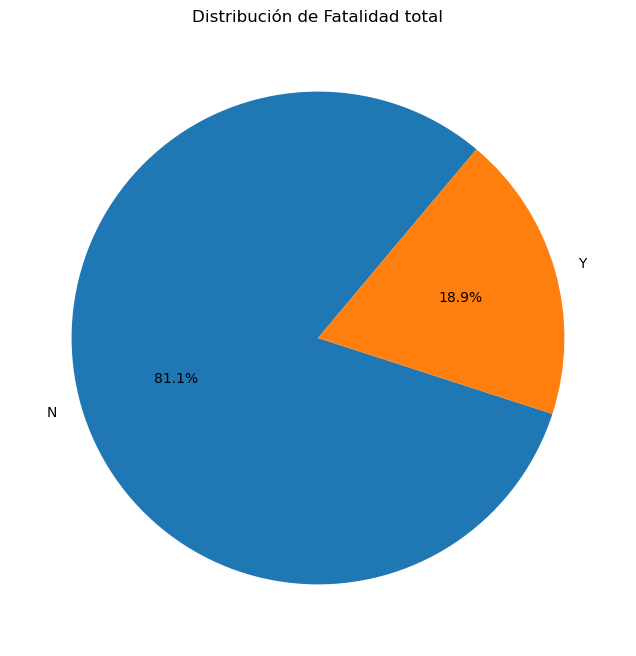

In [76]:
plt.figure(figsize=(8, 8)) # Para empezar realize un grafico facil para entender que porcentaje de si (muerte) o no (sobreviviente) en el total de los datos obtenidos. Realize un gráfico de torta (Pie Chart)
shark_attack['fatal_(y/n)'].value_counts().plot.pie(autopct='%1.1f%%', startangle=50)
plt.title("Distribución de Fatalidad total")
plt.ylabel("")

plt.show()

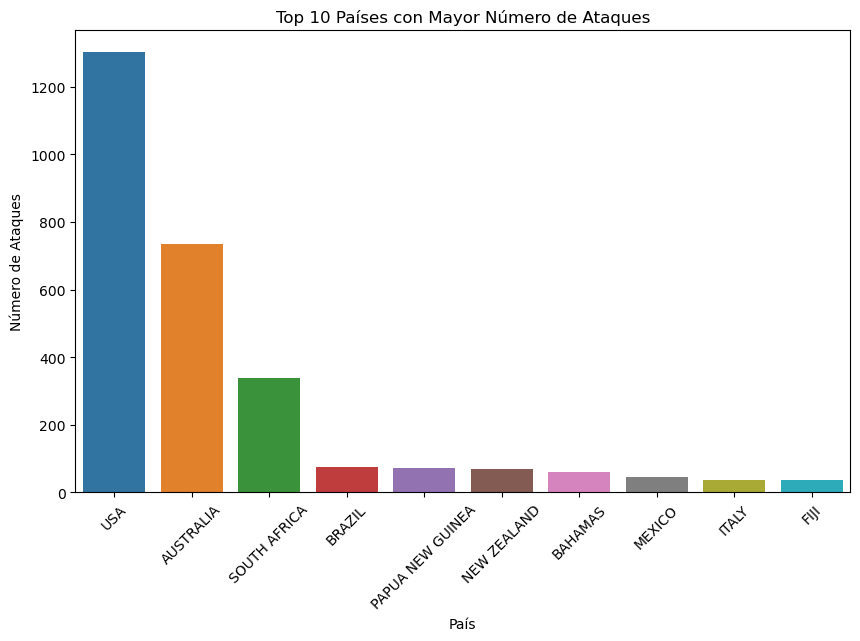

In [94]:
plt.figure(figsize=(10, 6)) # Aqui realizamos un couplot para ver cuales fueron los 10 principales paises con mayor numero de ataques
sns.countplot(data=shark_attack, x="country", order=shark_attack['country'].value_counts().index[:10])
plt.title("Top 10 Países con Mayor Número de Ataques")
plt.xlabel("País")
plt.ylabel("Número de Ataques")
plt.xticks(rotation=45)
plt.savefig('Top 10 Cantidad de casos fatales y no fatales por actividad')
plt.show()

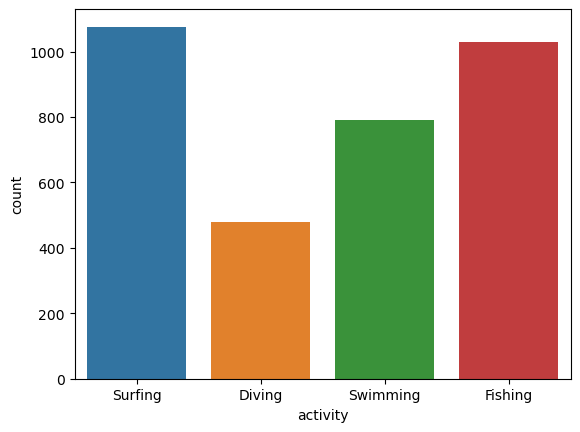

In [55]:
sns.countplot(x=shark_attack.activity); # Aqui realizamos otro countplot para ver las principales actividades que fueron susceptibles de ataque

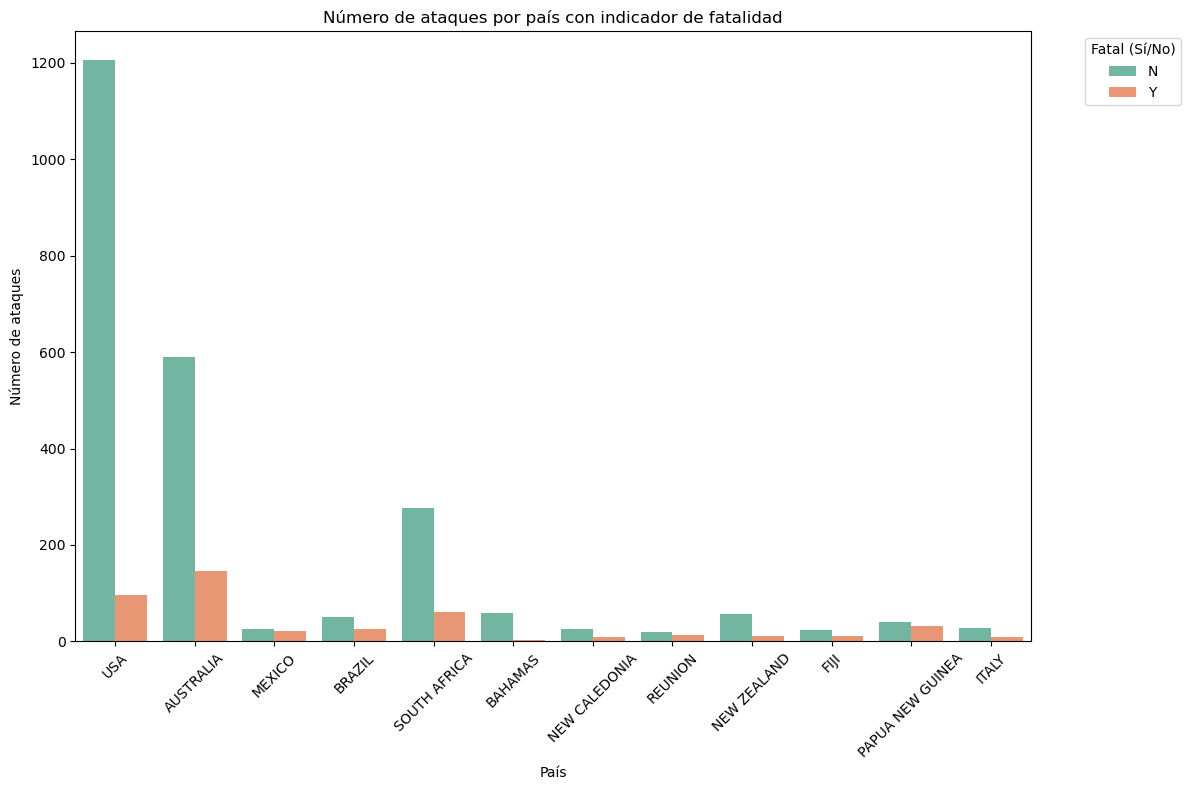

In [57]:
top_12_countries = shark_attack["country"].value_counts().head(12) # Aqui obtenemos los 12 países que mas ataques tubieron, viendo que cantidad di si(muertes) y no(sobrevivientes) teniamos
shark_attack_top_countries = shark_attack[shark_attack["country"].isin(top_12_countries.index)] # Filtramos el DataFrame para incluir solo los países más comunes

plt.figure(figsize=(12, 8)) # Trazamos el gráfico de barras con la columna "fatal_(y/n)" como hue
sns.countplot(data=shark_attack_top_countries, x="country", hue="fatal_(y/n)", palette="Set2")
plt.title("Número de ataques por país con indicador de fatalidad")
plt.xlabel("País")
plt.ylabel("Número de ataques")
plt.xticks(rotation=45)
plt.legend(title="Fatal (Sí/No)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() 
plt.show()

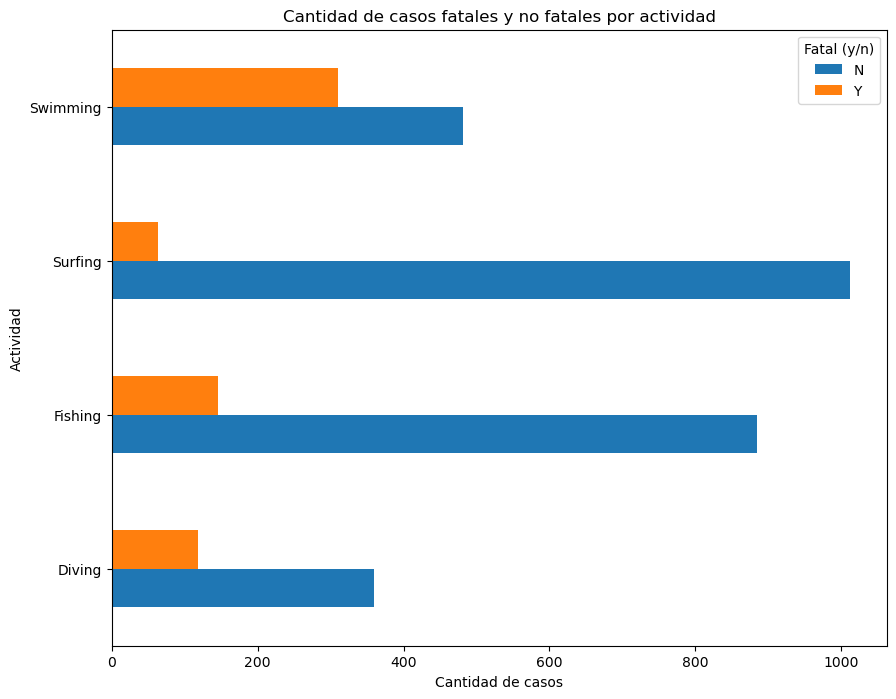

In [89]:
shark_attack.groupby(["activity", "fatal_(y/n)"])["activity"].count().unstack().plot(kind="barh", figsize=(10, 8)) # Aqui hicimos un grafico horizontal, utilizando el metodo groupby para una mejor vision de que actividades tuvieron mayor o menor cantidad de muertes o sobrevivientes.
plt.title("Cantidad de casos fatales y no fatales por actividad")
plt.xlabel("Cantidad de casos")
plt.ylabel("Actividad")
plt.legend(title="Fatal (y/n)")
plt.savefig('Cantidad de casos fatales y no fatales por actividad')
plt.show()

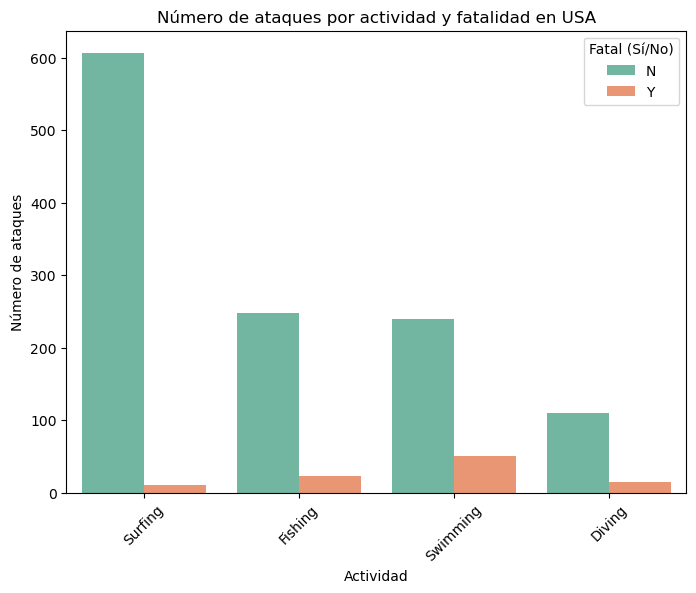

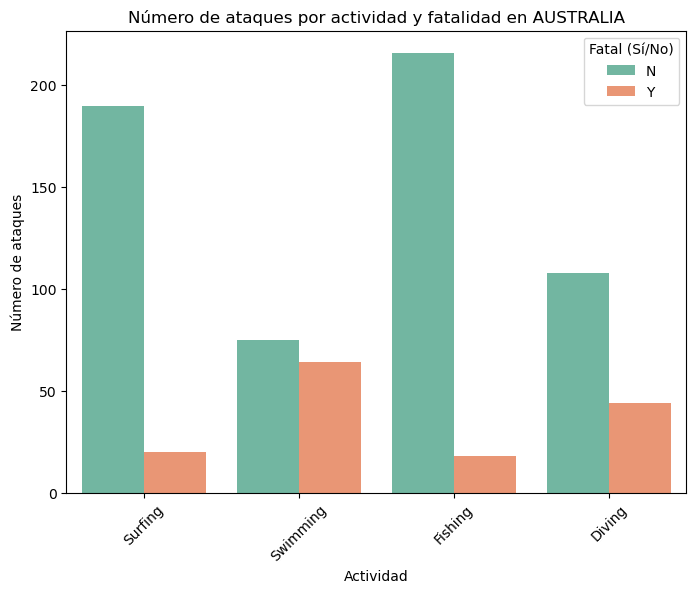

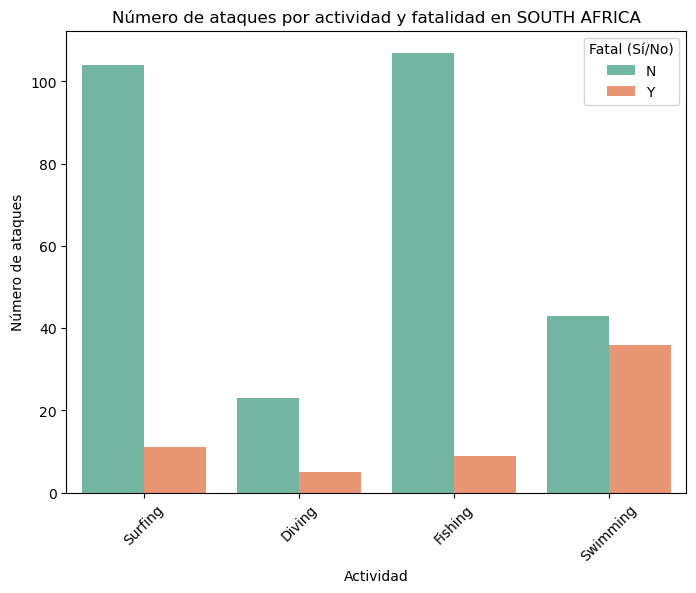

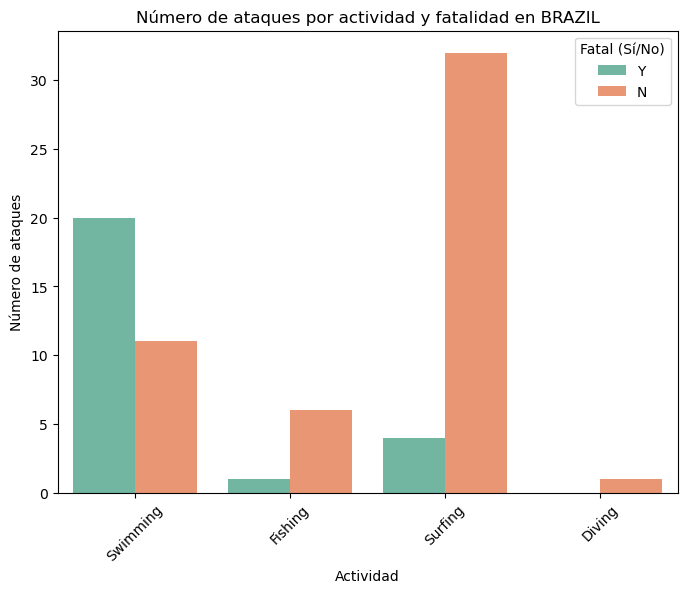

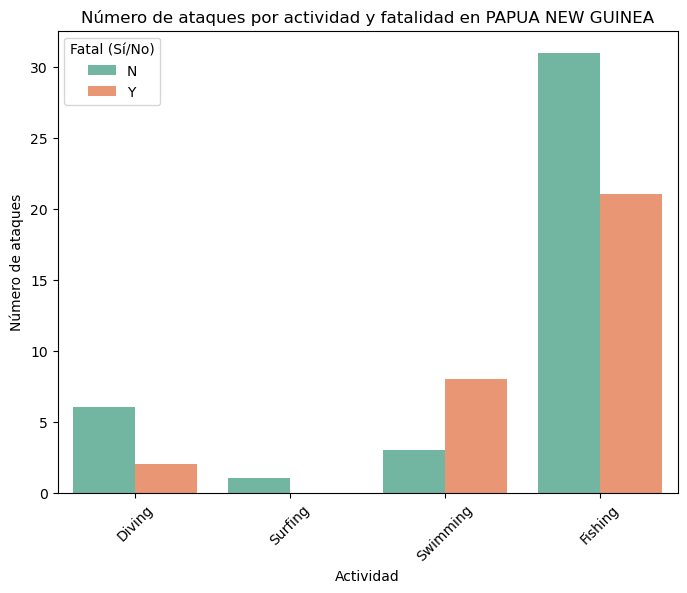

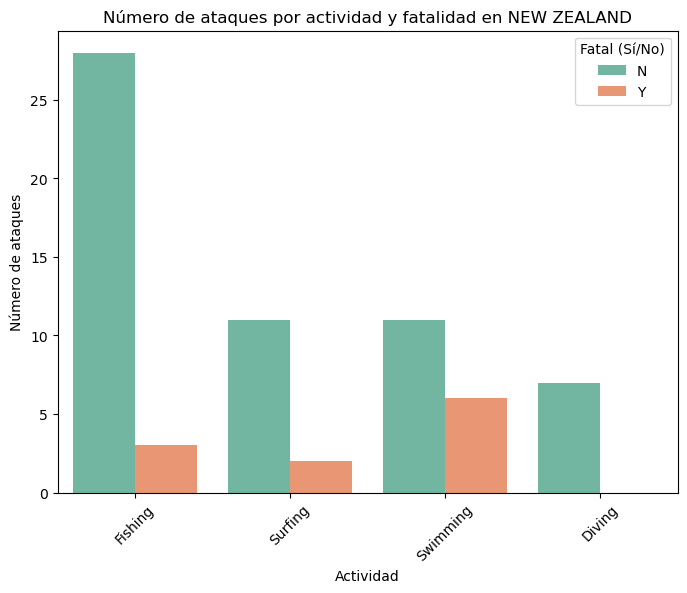

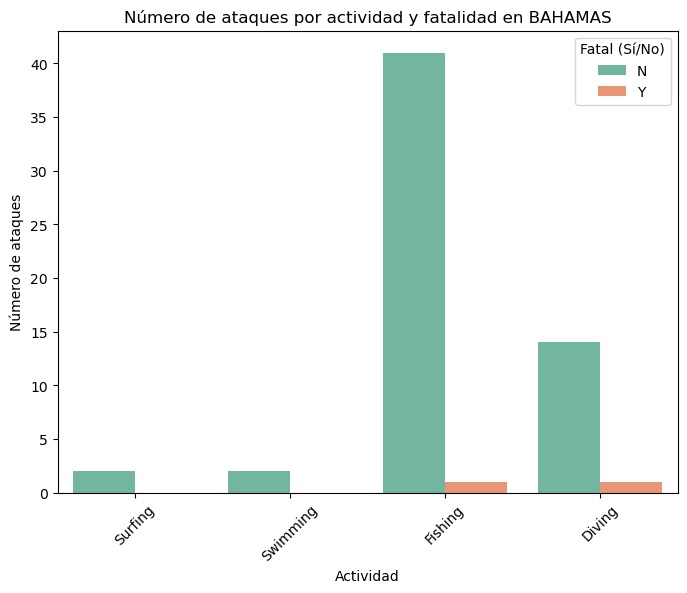

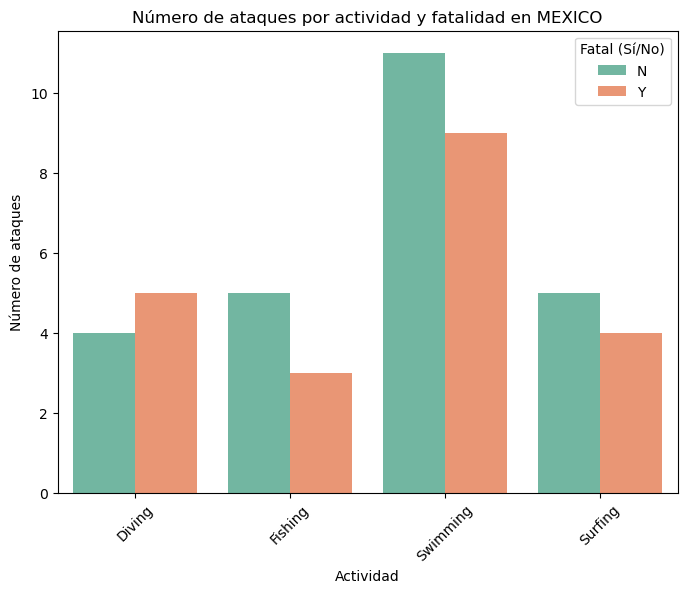

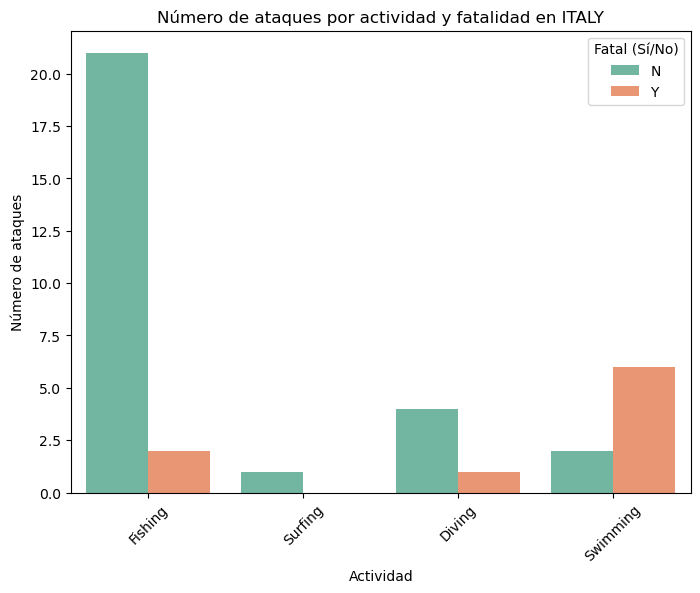

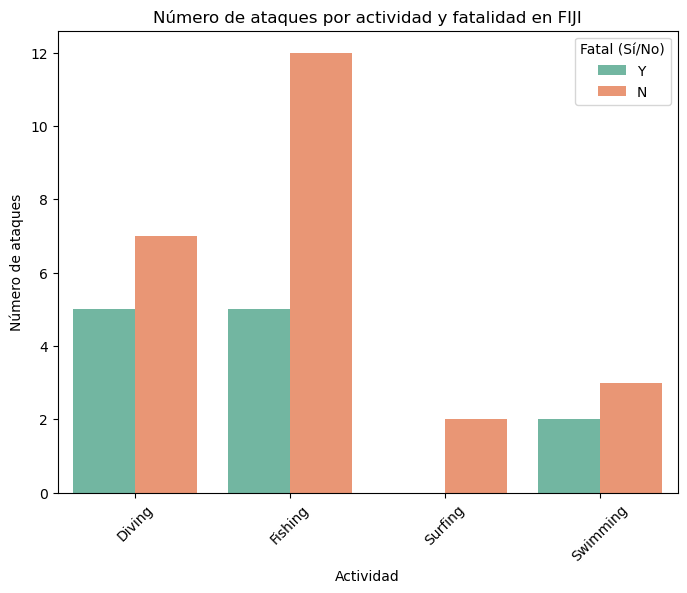

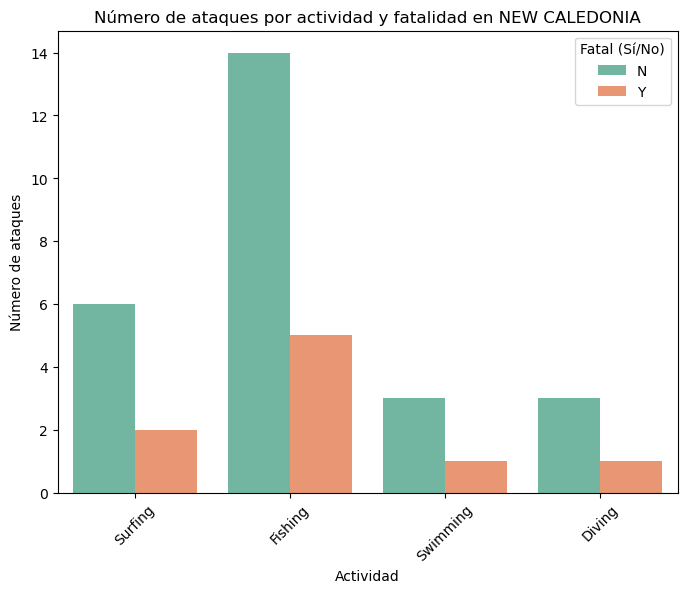

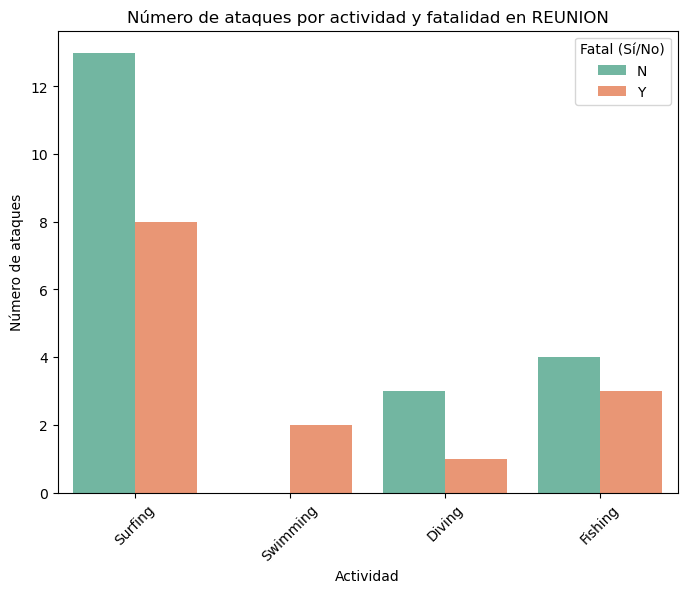

In [61]:
top_12_countries = shark_attack["country"].value_counts().head(12) # Aqui obtuvimos los 12 países con mas casos, Iteramos sobre los principales 12 países Filtrando el DataFrame para incluir solo pais por pais y Creamos un gráfico de barras para cada pais

for country in top_12_countries.index:
    shark_attack_country = shark_attack[(shark_attack["country"] == country)]
    
    plt.figure(figsize=(8, 6))
    sns.countplot(data=shark_attack_country, x="activity", hue="fatal_(y/n)", palette="Set2")
    plt.title(f"Número de ataques por actividad y fatalidad en {country}")
    plt.xlabel("Actividad")
    plt.ylabel("Número de ataques")
    plt.xticks(rotation=45)
    plt.legend(title="Fatal (Sí/No)")
    plt.show()

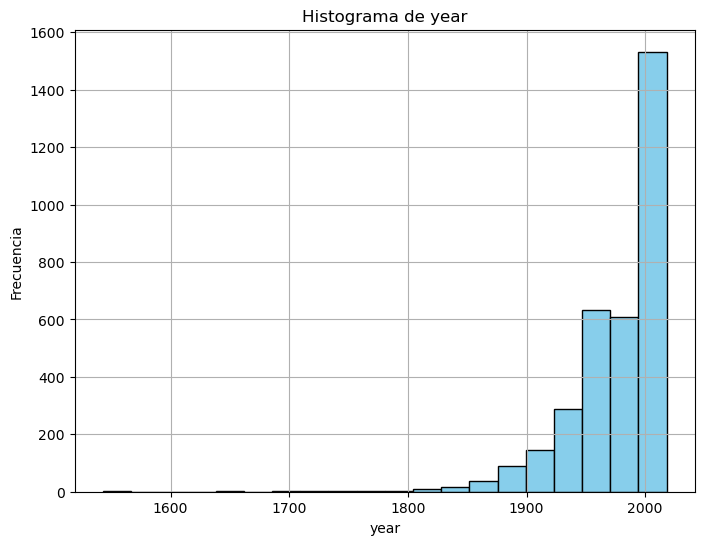

In [62]:
plt.figure(figsize=(8, 6)) # Realizamos un Histograma para la columna years, pero no se logra apreciar bien la cantidad de casos, si se refleja que la gran mayoria sucedieron en tiempos modernos.
plt.hist(shark_attack['year'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de year')
plt.xlabel('year')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

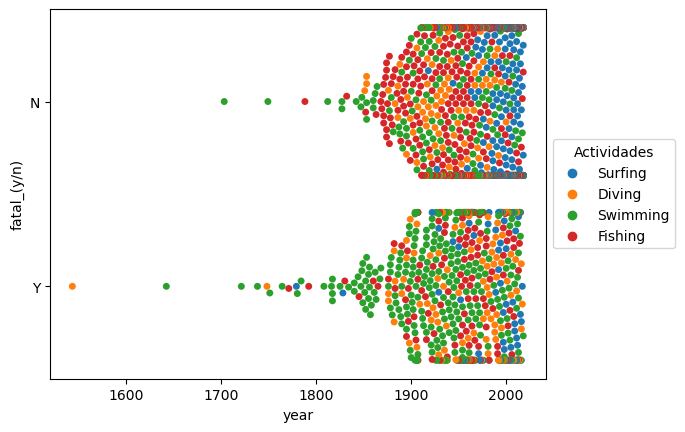

In [90]:
import warnings
warnings.filterwarnings("ignore")
sns.swarmplot(data=shark_attack, x="year", y="fatal_(y/n)", hue="activity")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Actividades")
plt.savefig('Swarmplot Cantidad de casos fatales y no fatales por actividad')
plt.show()

In [68]:
# Arriba realizamos un swarmplot que no sale tan bien pero da algun as muestras importantes, por ejemplo se ve como el color verde de swimming tiene muchos mas yes que no.

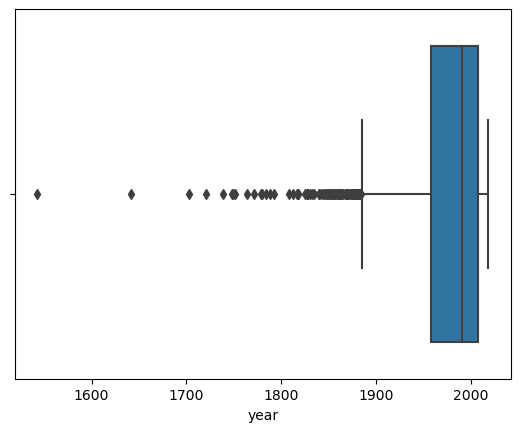

In [70]:
sns.boxplot(x="year", data=shark_attack); # Aqui realizamos un boxplot sencillo de la columna year.

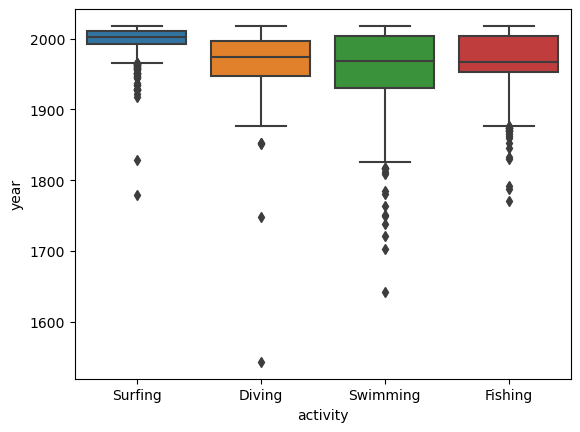

In [72]:
sns.boxplot(x="activity", y="year", data=shark_attack); # Aqui realizamos otro boxplot donde se relacionan la columna actividades y la columna year. 


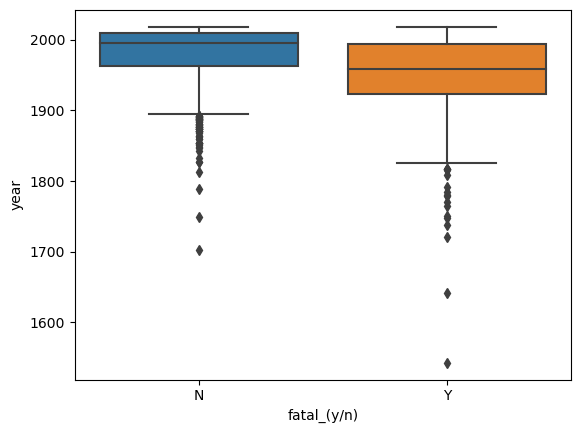

In [92]:
plt.savefig('boxplot')
sns.boxplot(x="fatal_(y/n)", y="year", data=shark_attack); # Aqui lo mismo podemos ver otro boxplot como se relacionan la columna fatal y la de years.

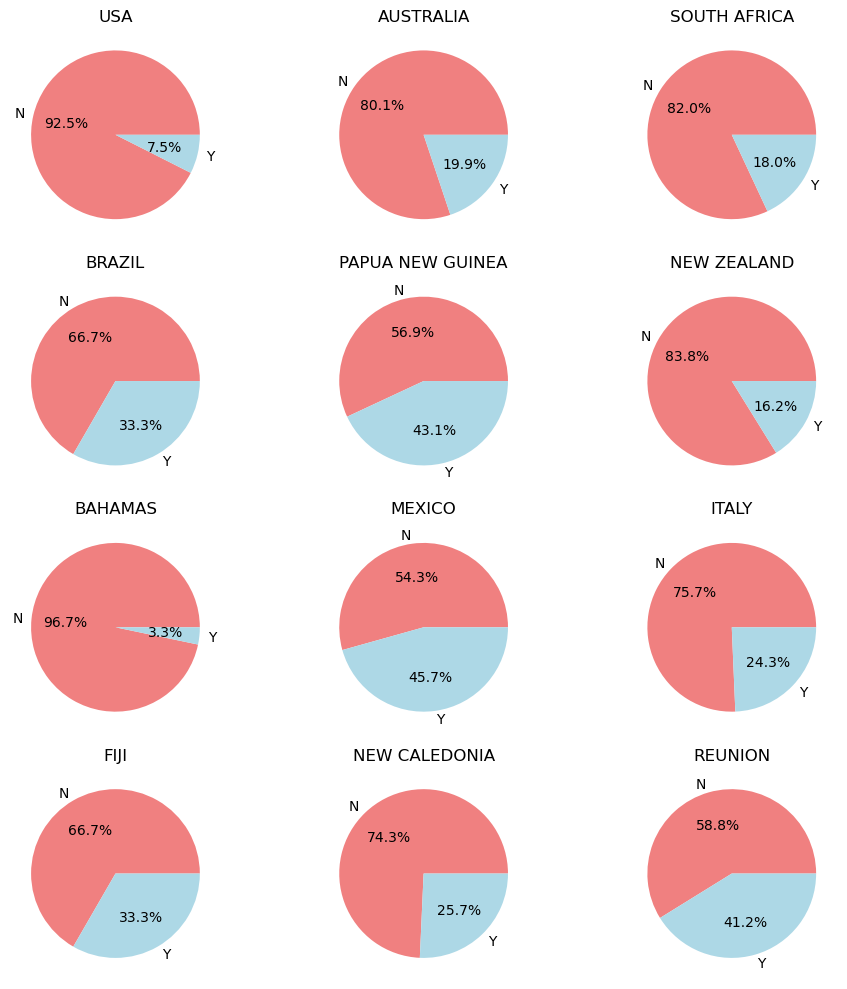

In [93]:
top_countries = shark_attack['country'].value_counts().head(12).index.tolist() # Aqui buscamos los principales 12 países, los Filtramos calculand0 la cantidad de casos fatales y no fatales para cada país. Creando distintos gráficos de tortas para cada país iterando por cada uno de ellos.

df_top_countries = shark_attack[shark_attack['country'].isin(top_countries)]
fatal_counts = df_top_countries.groupby(['country', 'fatal_(y/n)']).size().unstack(fill_value=0)

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))

for i, country in enumerate(top_countries):
    ax = axes[i//3, i%3]
    fatal_counts.loc[country].plot(kind='pie', ax=ax, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
    ax.set_title(country)
    ax.set_ylabel('')
plt.savefig('Cantidad de casos fatales y no fatales por pais')
plt.tight_layout()
plt.show()

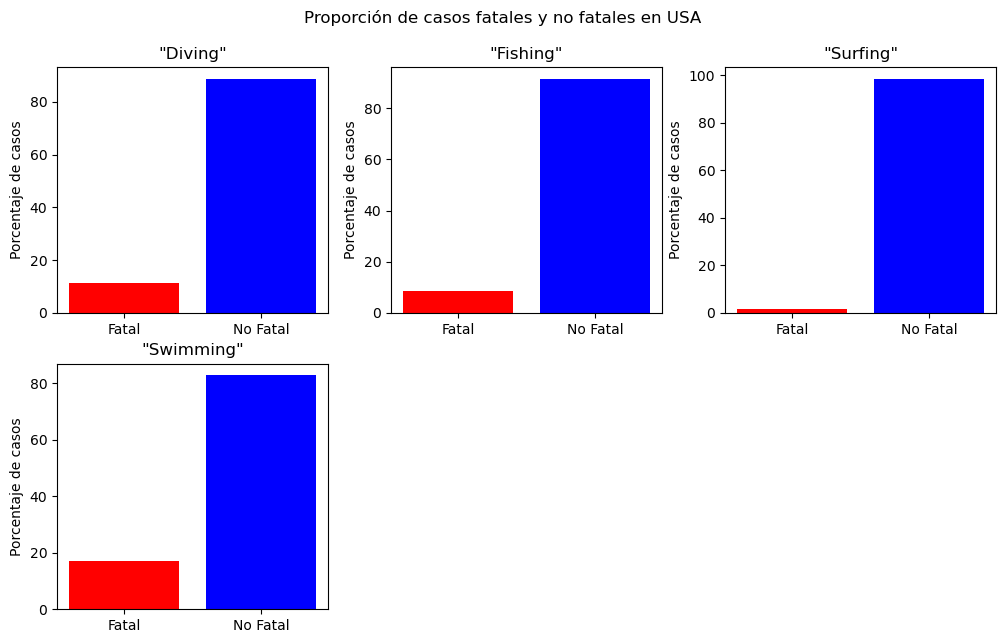

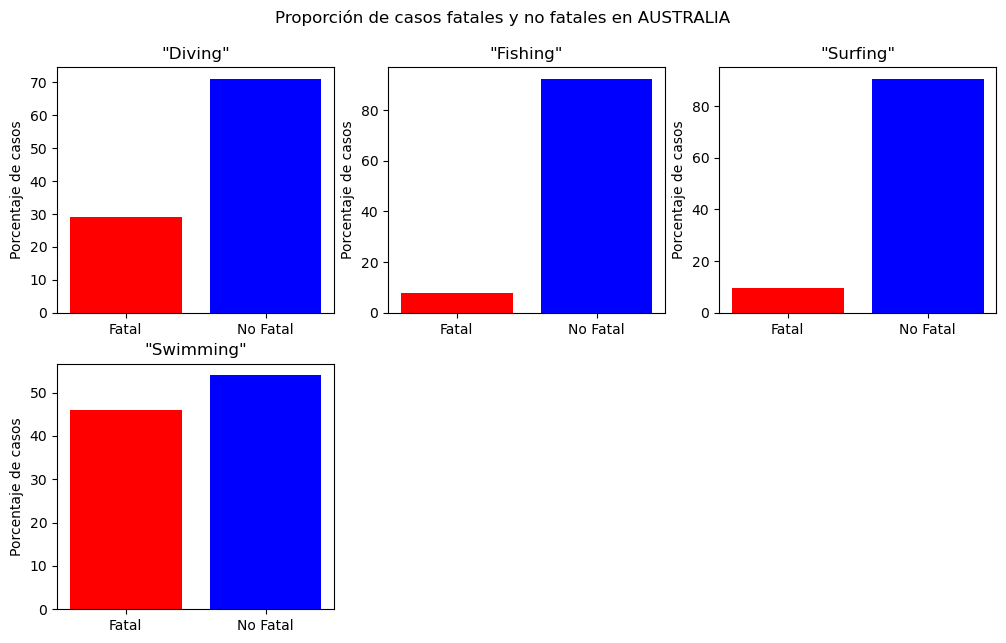

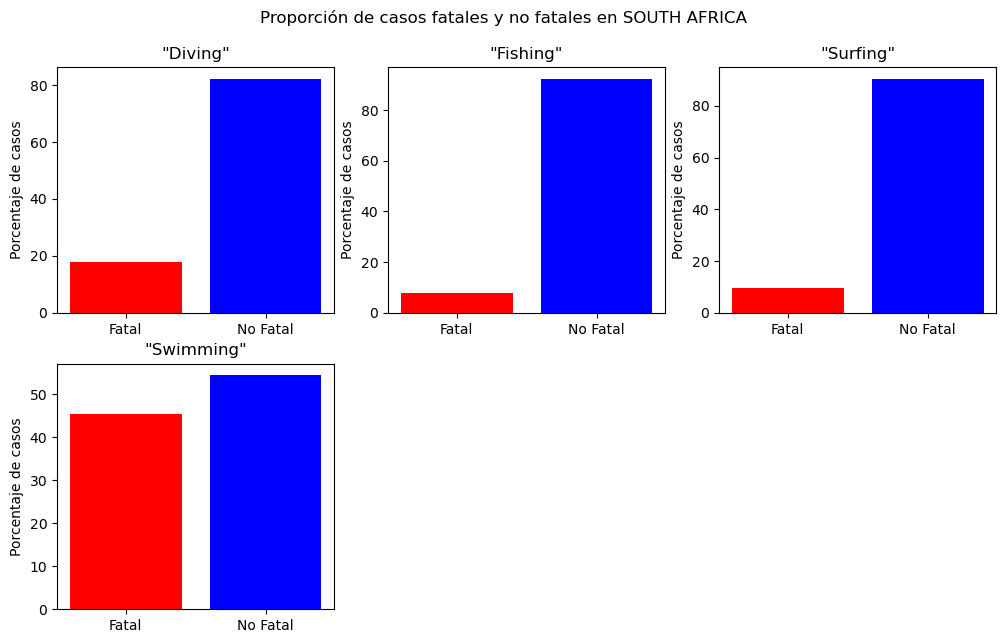

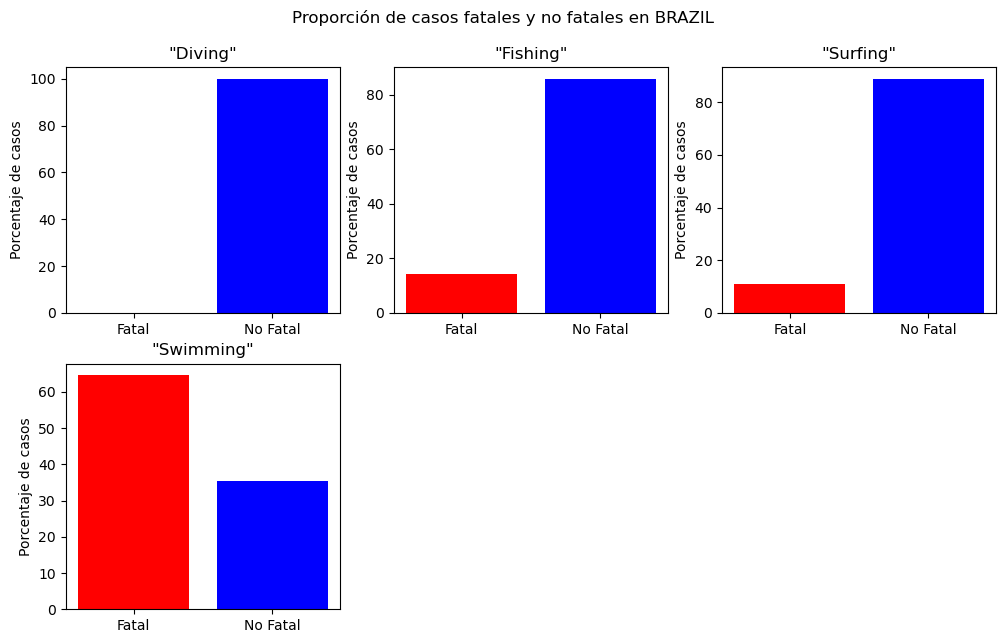

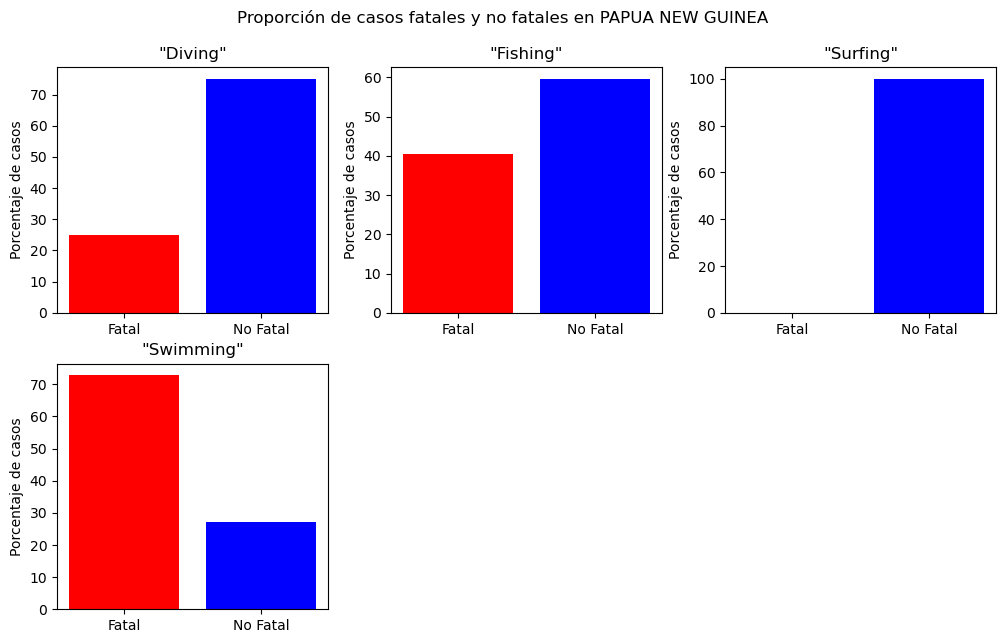

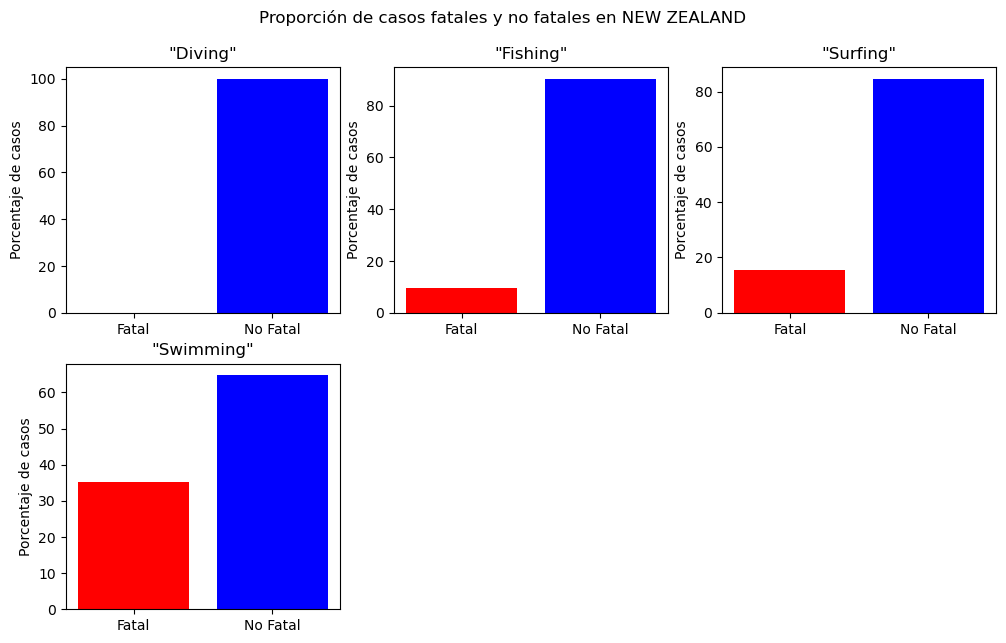

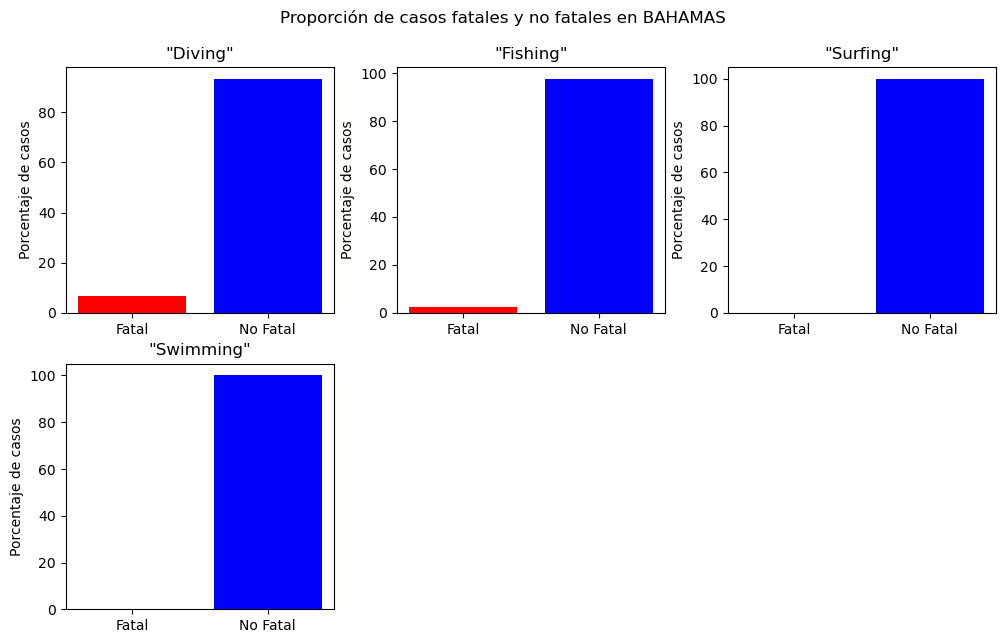

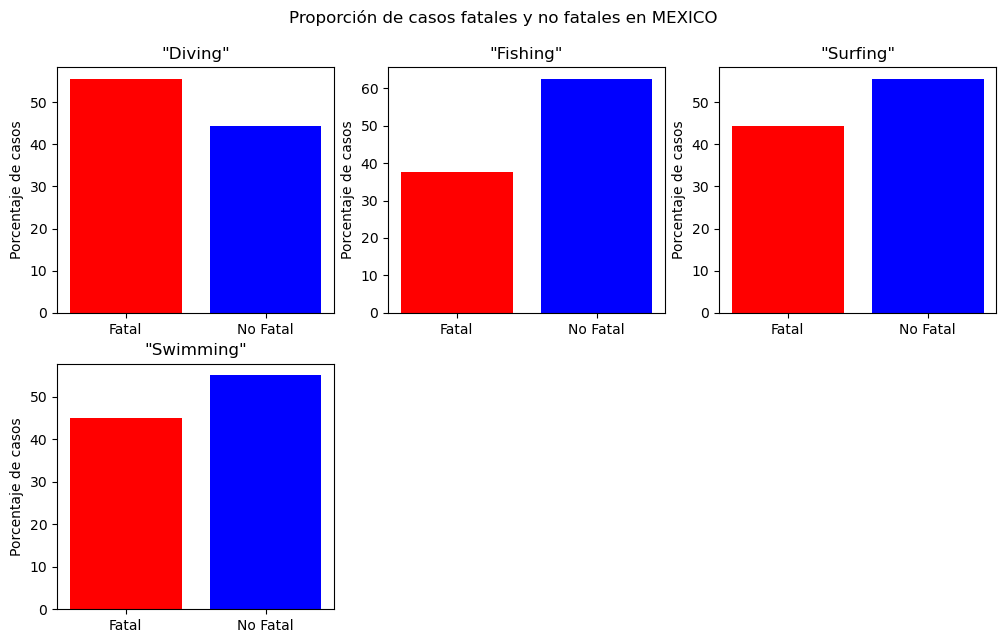

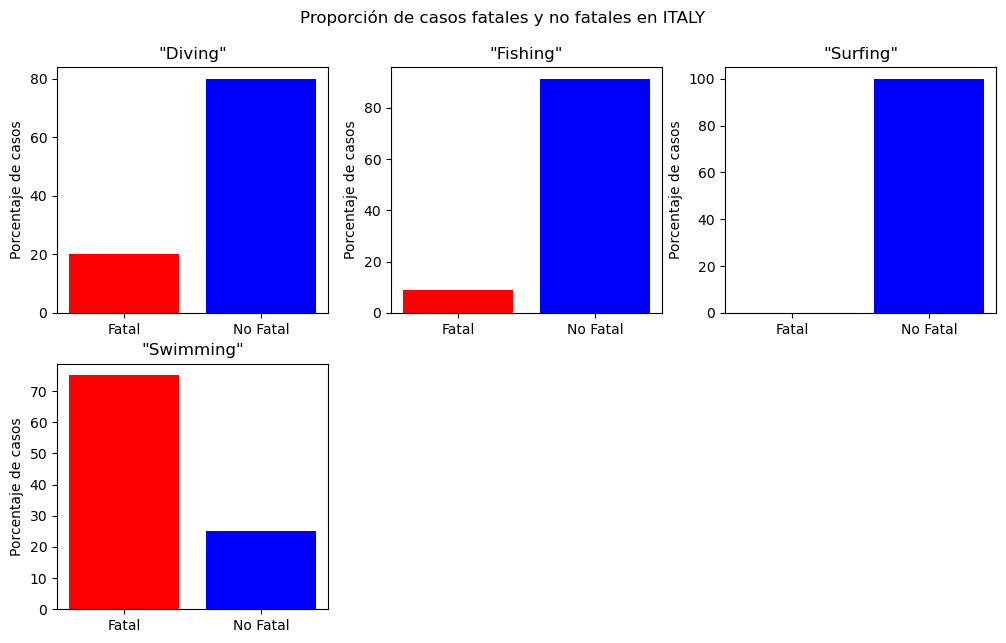

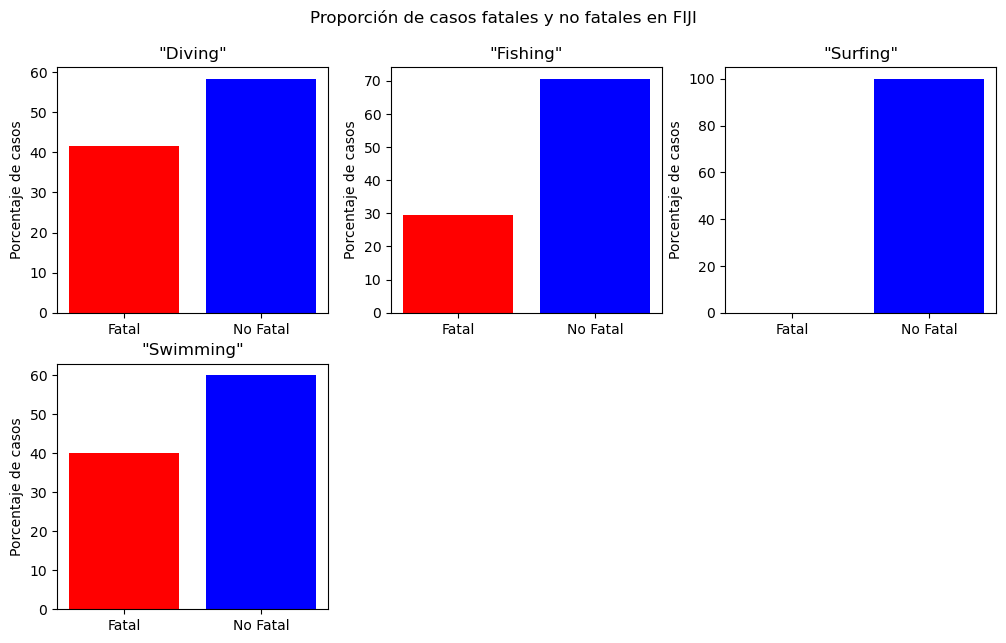

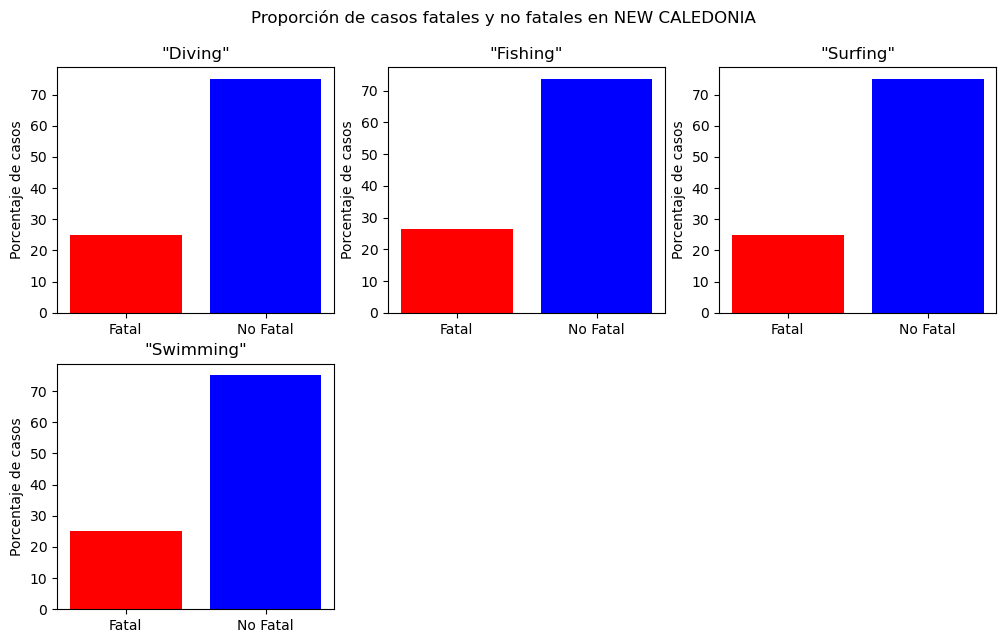

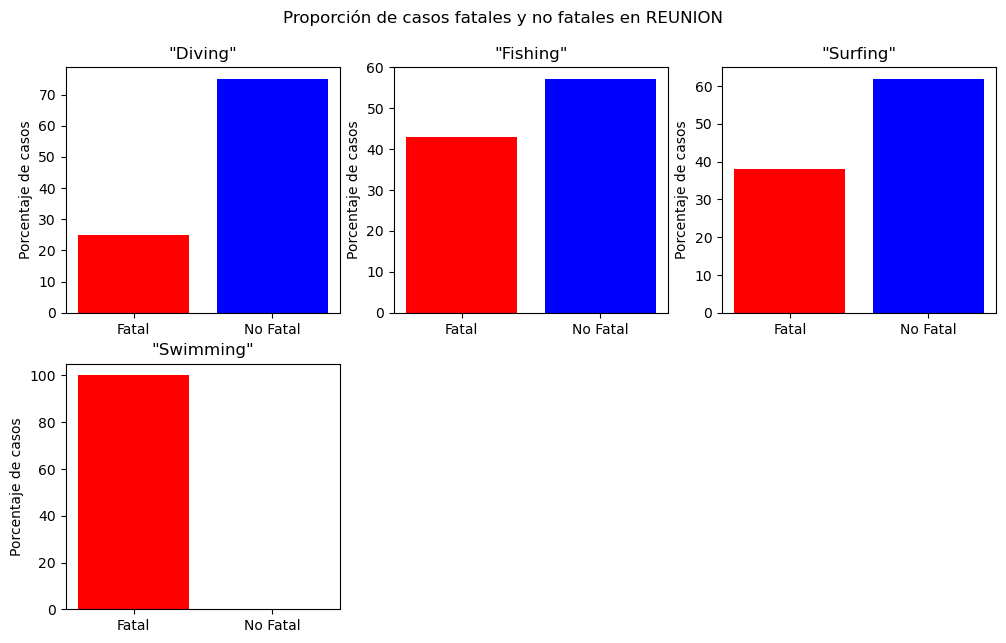

In [87]:
fig_width = 10 # Configura el tamaño de la figura y el espacio entre los gráficos
fig_height = 6
space_between = 0.5
n_cols = 3

for country in top_countries:# Crear una figura para cada país y Filtra el DataFrame para cada país
    country_fatal_counts = fatal_counts.loc[country]
    
    
    num_activities = len(country_fatal_counts)# Calcular el número de actividades, el número de columnas para la disposición de los gráficos y calcula el número de filas necesario para acomodar todos los gráficos
    n_cols = min(n_cols, num_activities)
    n_rows = (num_activities // n_cols) + (1 if num_activities % n_cols != 0 else 0)
    
    if num_activities > 0: # Crear subplots solo si hay actividades para mostrar,# Crea subplots para cada pais
        fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(fig_width, fig_height))
        
        for i, (activity, row) in enumerate(country_fatal_counts.iterrows()):# Itera sobre las actividades y crear histogramas
            ax = axs[i // n_cols, i % n_cols] if n_rows > 1 else axs[i % n_cols]
            
            total_cases = row.sum()  # Calcula el total de casos para cada actividad
            fatal_cases = row.get('Y', 0)
            non_fatal_cases = row.get('N', 0)

            fatal_percentage = (fatal_cases / total_cases) * 100 if total_cases != 0 else 0  # Calcula la proporción de casos fatales y no fatales
            non_fatal_percentage = (non_fatal_cases / total_cases) * 100 if total_cases != 0 else 0
            
            ax.bar(['Fatal', 'No Fatal'], [fatal_percentage, non_fatal_percentage], color=['red', 'blue']) # Crea el histograma para la actividad actual
            ax.set_title(f'"{activity}"')
            ax.set_ylabel('Porcentaje de casos')
        
        for i in range(num_activities, n_rows * n_cols):  # Elimina los subplots vacíos
            ax = axs[i // n_cols, i % n_cols] if n_rows > 1 else axs[i % n_cols]
            ax.axis('off')
        
        plt.tight_layout(pad=space_between) # Ajusta el diseño de los gráficos y muestra la figura
        plt.suptitle(f'Proporción de casos fatales y no fatales en {country}', y=1.05)
        plt.show()